<h1>Project Goals</h1>

Create a linear regression model that predicts the outcome for a tennis player based on their playing habits. By analysing and modeling the Association of Tennis Professionals (ATP) data, I will determine what it takes to be one of the best tennis players in the world.

Initially I am going to predict the number of wins based on the features.


<h2>Conclusion</h2>
MSE: 9.27
On average, the model's squared prediction error is about 3 wins.

R2 Score: 0.90

The model explains 90% of the variance in the number of wins on the test set.
For linear regression, R² = 0.90 is very strong.

This suggests that your features (after scaling and PCA) capture most of the patterns in the data.

Conclusion: The model has very good predictive power.

The model gets less accurate for higher number of wins, likely because there is not enough data where actual wins > 30.

In [1]:
# Import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

Loading in the data

In [2]:
df = pd.read_csv("tennis_stats.csv")

<h2>Inspecting the data</h2>

In [3]:
# Inspect the dataset
print(df.head(4))

                Player  Year  FirstServe  FirstServePointsWon  \
0          Pedro Sousa  2016        0.88                 0.50   
1      Roman Safiullin  2017        0.84                 0.62   
2          Pedro Sousa  2017        0.83                 0.60   
3  Rogerio Dutra Silva  2010        0.83                 0.64   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2                  0.38                10   
3                        0.33     2                  0.33                 5   

   ... 

In [4]:
df.info

<bound method DataFrame.info of                      Player  Year  FirstServe  FirstServePointsWon  \
0               Pedro Sousa  2016        0.88                 0.50   
1           Roman Safiullin  2017        0.84                 0.62   
2               Pedro Sousa  2017        0.83                 0.60   
3       Rogerio Dutra Silva  2010        0.83                 0.64   
4      Daniel Gimeno-Traver  2017        0.81                 0.54   
...                     ...   ...         ...                  ...   
1716             Yann Marti  2010        0.41                 0.66   
1717          Mikhail Elgin  2012        0.41                 0.60   
1718  Alexander Kudryavtsev  2012        0.40                 0.64   
1719           Ivan Nedelko  2011        0.37                 0.30   
1720       Alexander Zverev  2013        0.36                 0.50   

      FirstServeReturnPointsWon  SecondServePointsWon  \
0                          0.38                  0.50   
1            

After looking at the first few rows of the data it is important to gather details on the following:

<ul>
<li> The data type of each variable </li>
<li> How discrete/categorical data is coded and whether changes are needed  (encoding)</li>
<li> How the data are scaled </li>
<li> Identify missing data and how it is coded, what methods can be done to minimise impact of missing data </li>
<li> Identify outliers </li>
<li> The distribution of continuous features </li>
<li> The relationships between pairs of features </li>
</ul>

In [5]:
df.dtypes

Player                         object
Year                            int64
FirstServe                    float64
FirstServePointsWon           float64
FirstServeReturnPointsWon     float64
SecondServePointsWon          float64
SecondServeReturnPointsWon    float64
Aces                            int64
BreakPointsConverted          float64
BreakPointsFaced                int64
BreakPointsOpportunities        int64
BreakPointsSaved              float64
DoubleFaults                    int64
ReturnGamesPlayed               int64
ReturnGamesWon                float64
ReturnPointsWon               float64
ServiceGamesPlayed              int64
ServiceGamesWon               float64
TotalPointsWon                float64
TotalServicePointsWon         float64
Wins                            int64
Losses                          int64
Winnings                        int64
Ranking                         int64
dtype: object

The dataset contains only numerical data with the exception of <code>Player</code> which is of the object data type due to being a string.

The integers and floats represent integer numbers and decimals respectively.

Since there are no categorical variables, encoding is not required for this dataset.

It is also evident, data has been recorded correctly, ie there are no string integer values.

Column information:

Offence Game Columns

- Aces: number of serves by the player where the receiver does not touch the ball
- DoubleFaults: number of times player missed both first and second serve attempts
- FirstServe: % of first-serve attempts made
- FirstServePointsWon: % of first-serve attempt points won by the player
- SecondServePointsWon: % of second-serve attempt points won by the player
- BreakPointsFaced: number of times where the receiver could have won service game of the player
- BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ServiceGamesPlayed: total number of games where the player served
- ServiceGamesWon: total number of games where the player served and won
- TotalServicePointsWon: % of points in games where the player served that they won

Return Game Columns (Defensive)

<ul>
<li>FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win</li>
<li>SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win</li>
<li>BreakPointsOpportunities: number of times where the player could have won the service game of the opponent</li>
<li>BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance</li>
<li>ReturnGamesPlayed: total number of games where the player’s opponent served
ReturnGamesWon: total number of games where the player’s opponent served and the player won</li>
<li>ReturnPointsWon: total number of points where the player’s opponent served and the player won</li>
<li>TotalPointsWon: % of points won by the player</li>
</ul>

Outcomes

- Wins: number of matches won in a year
- Losses: number of matches lost in a year
- Winnings: total winnings in USD($) in a year
- Ranking: ranking at the end of year

<h2>Checking for Missing Values</h2>

In [6]:
df.isnull().sum()

Player                        0
Year                          0
FirstServe                    0
FirstServePointsWon           0
FirstServeReturnPointsWon     0
SecondServePointsWon          0
SecondServeReturnPointsWon    0
Aces                          0
BreakPointsConverted          0
BreakPointsFaced              0
BreakPointsOpportunities      0
BreakPointsSaved              0
DoubleFaults                  0
ReturnGamesPlayed             0
ReturnGamesWon                0
ReturnPointsWon               0
ServiceGamesPlayed            0
ServiceGamesWon               0
TotalPointsWon                0
TotalServicePointsWon         0
Wins                          0
Losses                        0
Winnings                      0
Ranking                       0
dtype: int64

Remarkably, there is no missing data - no imputation needed. The above gives us a breakdown of the columns in the dataset. This is likely the case as it is a 'training' dataset. In real life this is unrealistic. 

I like to store the columns in a dataframe as sometimes I like to quickly access them for reference.

In [7]:
columns = df.columns

<h2>Scaling </h2>

It is important to scale features based on the nature of what they are. To get an indication of the scales for each feature I use the describe method.

For example, <code>Year</code> is on a totally different scale to <code>FirstServePointsWon</code>. This exists because the features measure two vastly different things. As best practice it makes sense to standardise the features such that they have a mean of 0 and standard deviation of one. 

I plan to fit a linear regression model - typically these models are sensitve to feature scales. This will improve interpretability of coefficients.

Thinking about <code>Year</code> in more detail there are some key points to consider:
    
Pros:
    It might capture temportal trends
    Proxy for experience wrt an individual player

Cons:
    It is just a timestamp with no intrinsic relation to the outcome, potentially add noise. 
    The dataset spans the years from 2009 to 2017 and in that time includes different players across the years. 

The plan is to include it to start with, check if the corr coeff is significant, drop it if not significant. If significant it is sensible to scale the value. For now I will carry on with my EDA.


In [8]:
df.describe()

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
count,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,...,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1721.000000,1.721000e+03,1721.000000
mean,2013.646717,0.598053,0.680738,0.261673,0.479733,0.466432,97.105171,0.369407,112.003486,102.918071,...,0.173823,0.342208,197.650203,0.715590,0.473155,0.599245,7.876816,9.278908,2.344928e+05,269.610691
std,2.488018,0.054533,0.070422,0.056639,0.066902,0.068447,137.966077,0.162987,119.247651,122.761670,...,0.080880,0.049369,221.208703,0.123287,0.037139,0.057718,10.183716,8.996450,2.530537e+05,277.341947
min,2009.000000,0.360000,0.270000,0.000000,0.060000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.220000,0.250000,0.000000,0.000000,1.080000e+02,3.000000
25%,2012.000000,0.570000,0.650000,0.240000,0.460000,0.440000,7.000000,0.320000,15.000000,9.000000,...,0.130000,0.320000,22.000000,0.670000,0.460000,0.570000,0.000000,2.000000,4.931100e+04,83.000000
50%,2014.000000,0.600000,0.690000,0.270000,0.490000,0.480000,34.000000,0.380000,55.000000,41.000000,...,0.180000,0.350000,86.000000,0.750000,0.480000,0.610000,3.000000,5.000000,1.252120e+05,166.000000
75%,2016.000000,0.630000,0.720000,0.290000,0.520000,0.500000,140.000000,0.430000,201.000000,172.000000,...,0.220000,0.370000,348.000000,0.790000,0.500000,0.630000,13.000000,17.000000,3.500750e+05,333.000000
max,2017.000000,0.880000,0.890000,0.480000,0.920000,0.750000,1185.000000,1.000000,507.000000,573.000000,...,0.560000,0.510000,916.000000,1.000000,0.820000,0.820000,48.000000,36.000000,1.074562e+06,1443.000000


<h2>Checking for outliers, distributions and associations</h2>

I am going to drop the <code>Player</code> column as it is not relevant for the EDA.

In [9]:
df = df.drop(columns='Player')


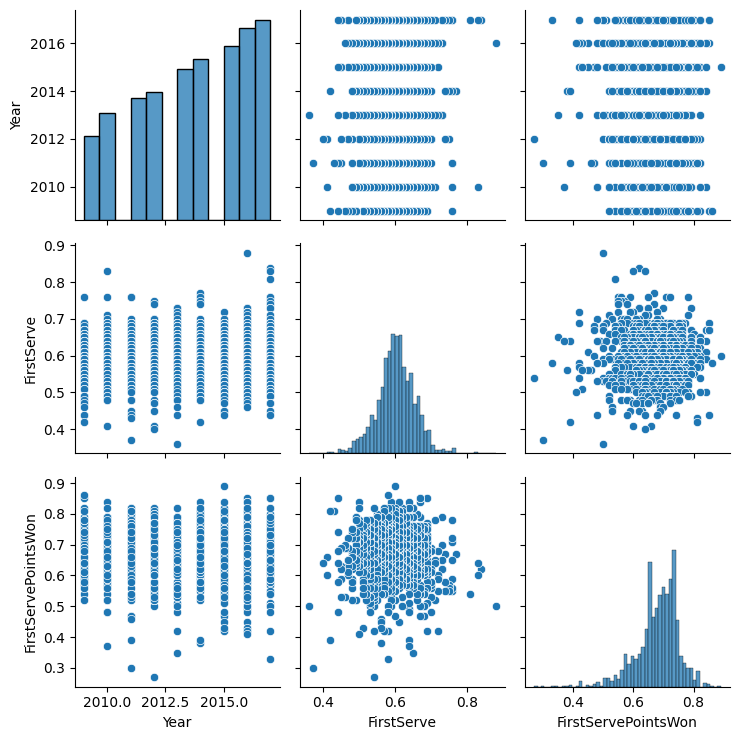

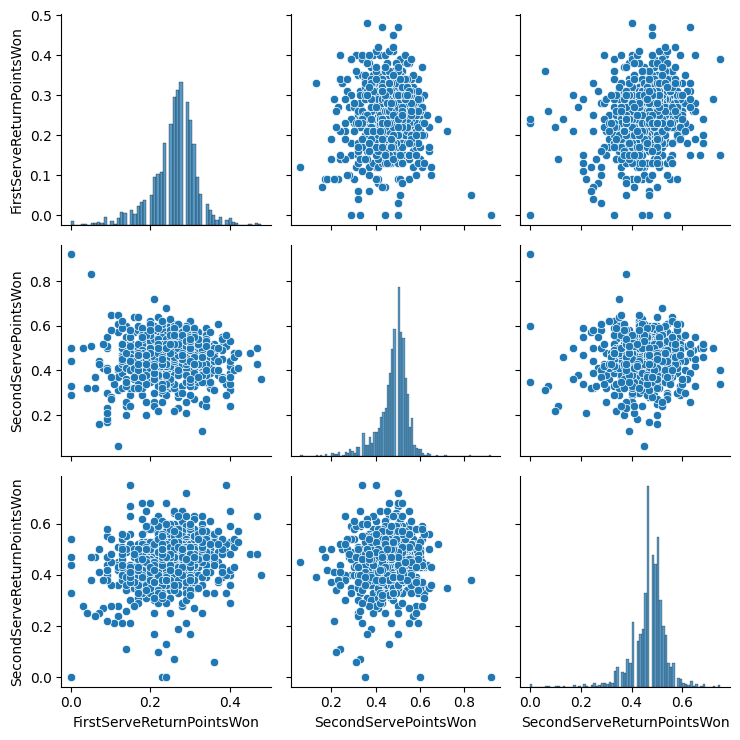

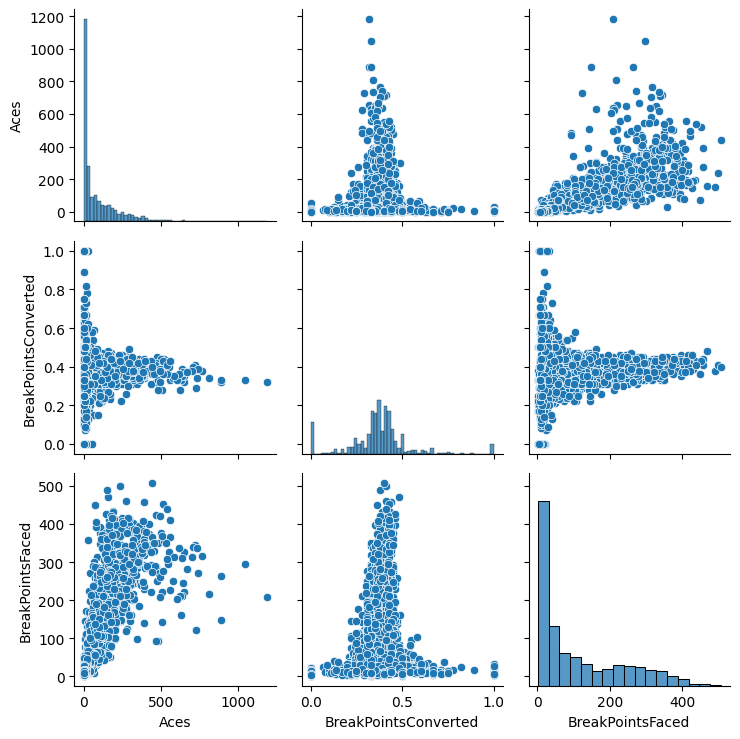

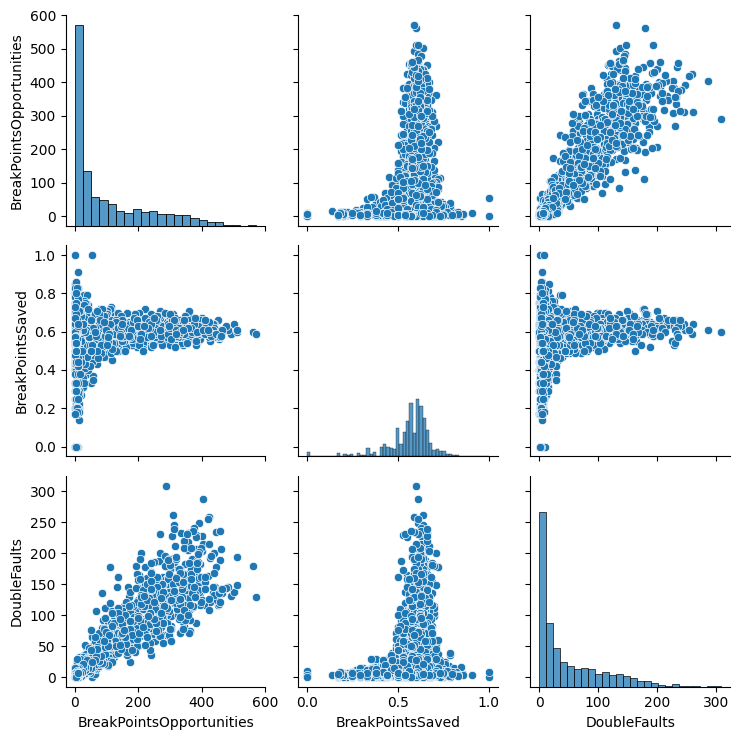

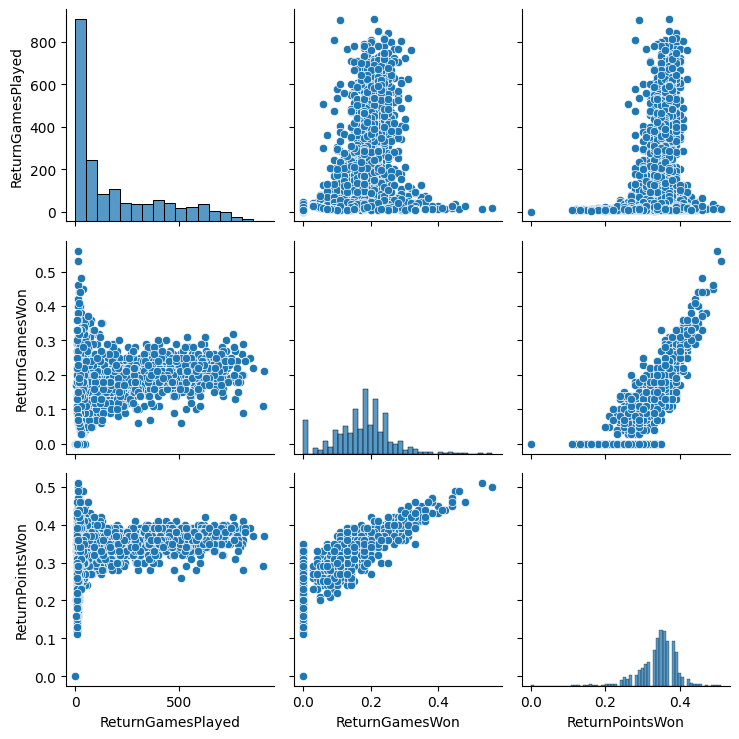

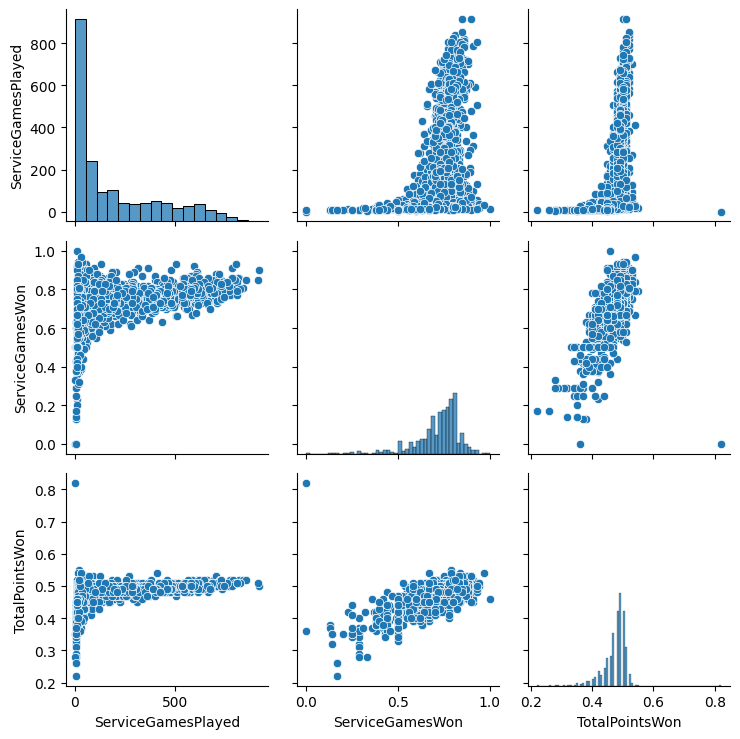

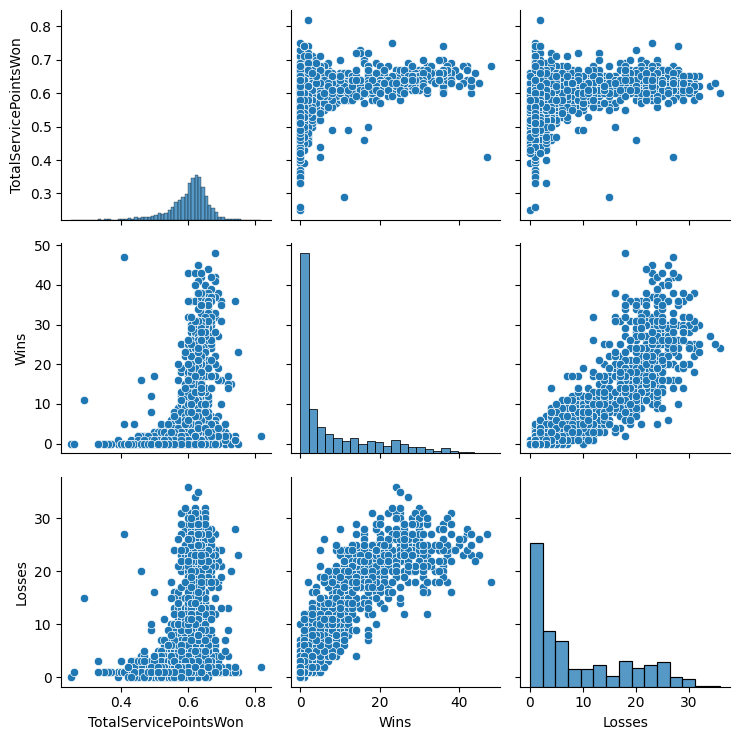

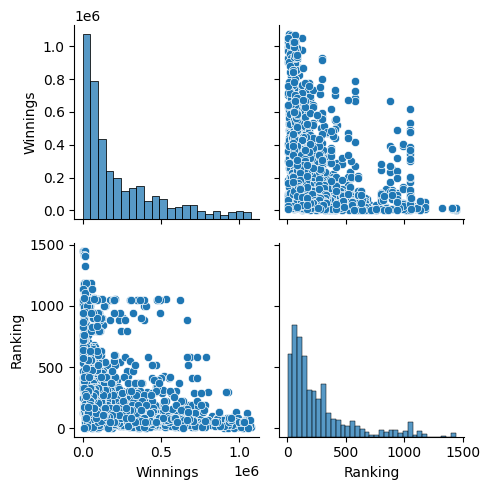

In [10]:
# Need to split the features across multiple pairplots for readability
all_features = df.columns

chunk_size = 3
feature_groups = [all_features[i:i + chunk_size] for i in range(0, len(all_features), chunk_size)]

for i, group in enumerate(feature_groups):
    sns.pairplot(df, vars=group)
    plt.tight_layout()
    plt.show()

An obvious drawback to the above is that not all combinations of pairs are displayed. A key takeaway here is to keep an open mind and take note of any particular outliers and distributions.

Many vairables are normally distributed, some skewed to the right so noted down as a log transform may be required. There are also some variables where it does not make the most sense to compare them in a pairplot, for example <code>Year</code> and <code>FirstServePointPointsWin</code> based on context I do not expect to provide much value to the linear. 

It makes sense to look at the most correlated pairs of features next.

,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,BreakPointsOpportunities,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
Year,1.000000,0.051406,-0.016728,-0.106784,0.005300,-0.039087,-0.108367,-0.072404,-0.101735,-0.114806,...,-0.073256,-0.078229,-0.108477,-0.008930,-0.041790,-0.005544,-0.108235,-0.077181,0.043908,-0.040483
FirstServe,0.051406,1.000000,-0.070659,0.025488,0.101417,-0.001924,0.048149,-0.018877,0.057709,0.062345,...,-0.010676,0.004189,0.071920,0.137473,0.148349,0.180996,0.064832,0.053736,0.057882,-0.068759
FirstServePointsWon,-0.016728,-0.070659,1.000000,0.021729,0.320765,-0.004724,0.460323,-0.041538,0.301925,0.324853,...,-0.010193,-0.002793,0.376460,0.817829,0.648753,0.860033,0.356702,0.330581,0.361121,-0.150004
FirstServeReturnPointsWon,-0.106784,0.025488,0.021729,1.000000,0.072707,0.301265,0.140165,0.324057,0.295724,0.313338,...,0.757435,0.834267,0.261206,0.091319,0.496682,0.052335,0.256029,0.243278,0.240808,-0.178664
SecondServePointsWon,0.005300,0.101417,0.320765,0.072707,1.000000,0.103584,0.266269,0.052755,0.258691,0.277782,...,0.096622,0.095585,0.296809,0.650764,0.622673,0.713076,0.268979,0.250918,0.281215,-0.181013
SecondServeReturnPointsWon,-0.039087,-0.001924,-0.004724,0.301265,0.103584,1.000000,0.095494,0.264413,0.234212,0.249583,...,0.603755,0.727338,0.209521,0.096553,0.408975,0.055004,0.193093,0.185217,0.199401,-0.159592
Aces,-0.108367,0.048149,0.460323,0.140165,0.266269,0.095494,1.000000,0.037188,0.757405,0.784934,...,0.139987,0.138023,0.866138,0.440922,0.428679,0.472101,0.825301,0.768628,0.798404,-0.277811
BreakPointsConverted,-0.072404,-0.018877,-0.041538,0.324057,0.052755,0.264413,0.037188,1.000000,0.096368,0.086502,...,0.561759,0.387170,0.083182,-0.025670,0.255050,-0.007254,0.076989,0.062297,0.075022,-0.051005
BreakPointsFaced,-0.101735,0.057709,0.301925,0.295724,0.258691,0.234212,0.757405,0.096368,1.000000,0.973352,...,0.335205,0.331043,0.971296,0.354012,0.463110,0.354005,0.883470,0.943309,0.876036,-0.322082
BreakPointsOpportunities,-0.114806,0.062345,0.324853,0.313338,0.277782,0.249583,0.784934,0.086502,0.973352,1.000000,...,0.358483,0.352783,0.978278,0.372271,0.491198,0.380716,0.923453,0.909295,0.900444,-0.334548


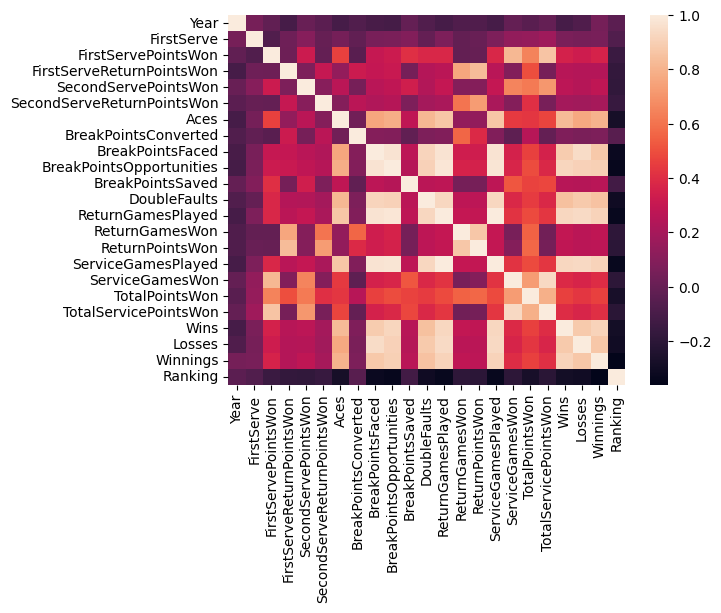

In [11]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix)

display(correlation_matrix)

Strong Positive Correlations

- Wins is highly correlated with:
- TotalPointsWon
- ReturnGamesWon
- ServiceGamesWon
- ReturnPointsWon
- TotalServicePointsWon

This makes sense: winning more points and games is obviously tied to match wins.

- ServiceGamesPlayed and ServiceGamesWon are strongly correlated.
- ReturnGamesPlayed and ReturnGamesWon also show strong correlation.
- Takeaway: There’s likely redundancy among some of these features. Consider using PCA or feature selection to avoid multicollinearity in my model.

Potentially Redundant Features

- TotalPointsWon, ReturnPointsWon, and TotalServicePointsWon all seem to capture similar success metrics.
- BreakPointsConverted, BreakPointsOpportunities, and BreakPointsSaved may overlap or interact — check variance inflation if using linear models.

Low or Negative Correlations

- Year has weak correlation with almost everything — as expected.
- DoubleFaults appears to have low correlation with wins and other key performance metrics (it might be noisy or only matter when extreme).
- Ranking likely has negative correlation with Wins, as lower rankings (numerically) mean better performance.

I am going to remove some of the redundant and low correlation features.

In [12]:
# These features specifically do not have much impact on the number of wins, using a corr of 0.4 as the minimum threshold
columns_to_drop = []

wins_correlation = correlation_matrix["Wins"]
# DEBUG print(wins_correlation)

for col, corr in wins_correlation.items():
    if abs(corr) < 0.35 and col != "Wins":
        columns_to_drop.append(col)

# Drop the columns 
df.drop(columns=columns_to_drop)

,FirstServePointsWon,Aces,BreakPointsFaced,BreakPointsOpportunities,DoubleFaults,ReturnGamesPlayed,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings
0,0.50,0,7,7,2,9,8,0.50,0.43,0.50,1,2,39820
1,0.62,7,7,0,1,9,9,0.67,0.41,0.57,0,1,17334
2,0.60,2,10,8,1,19,17,0.65,0.45,0.59,4,1,109827
3,0.64,2,5,6,0,14,15,0.80,0.49,0.63,0,0,9761
4,0.54,1,2,0,2,3,2,0.50,0.35,0.50,0,1,32879
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,0.66,1,8,4,7,13,12,0.67,0.45,0.53,0,1,9117
1717,0.60,3,13,5,3,9,10,0.40,0.45,0.46,16,20,89755
1718,0.64,4,13,4,4,14,14,0.57,0.40,0.51,0,1,44566
1719,0.30,1,5,5,1,7,6,0.17,0.26,0.26,0,1,17527


<h2>Adhering to Linear Regression Assumptions</h2>
My main concern is contradicting multicollinearity assumptions, there are some hihgly correllared features (>0.75) such as </code>ServiceGamesPlayed</code> and <code>Aces</code>, there are also some strong linear trends between features seen in the pairplot. To investigate the impact numerically I am going to conduct VIF analysis.

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Predictor Variables 
X = df

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
display(vif_data)

,Feature,VIF
0,Year,867.498701
1,FirstServe,457.726120
2,FirstServePointsWon,3982.480884
3,FirstServeReturnPointsWon,217.287337
4,SecondServePointsWon,939.006285
5,SecondServeReturnPointsWon,295.205498
6,Aces,17.868571
7,BreakPointsConverted,10.442397
8,BreakPointsFaced,115.042222
9,BreakPointsOpportunities,102.744328


The really high VIF scores indicates multiple collinearity at a very high level, so a simple linear regression model is not suitable in this state. This makes sense as features <code>ServiceGamesPlayed</code> and <code>ServiceGamesWon</code> would be highly linearly correllated. I am going to PCA to fix this.

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95) 
X_pca = pca.fit_transform(X_scaled)

I have also scaled the data as best practice. Now I will move on to fitting the model.

In [17]:
# Predictor variables
X = df.drop(columns="Wins")
# Response variable
y = df["Wins"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mse = {mse}")
print(f"r2 = {r2}")

mse = 11.679596690595794
r2 = 0.8738726089341584


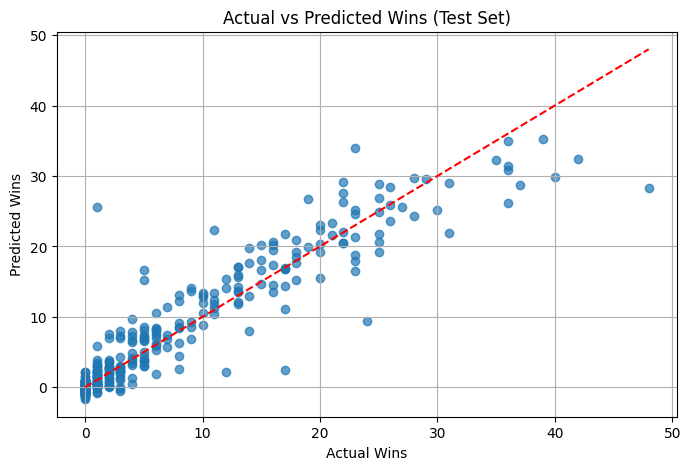

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Actual vs Predicted Wins (Test Set)")
plt.grid(True)
plt.show()

MSE: 11.6
On average, the model's squared prediction error is about 3.4 wins.

R2 Score: 0.874

The model explains 90% of the variance in the number of wins on the test set.
For linear regression, R² = 0.90 is very strong.

This suggests that your features (after scaling and PCA) capture most of the patterns in the data.

Conclusion: The model has very good predictive power.

The model gets less accurate for higher number of wins, likely because there is not enough data where actual wins > 30.